# Espacios vectoriales 



Sea $V$ un conjunto de elementos (estos elementos serán llamados vectores), y 
 $F$ un campo (en nuestro caso serán los números reales o complejos, es llamado un espacio vectorial si satisface los siguientes axiomas

1. Axiomas de Clausura
  
  a.  Si $x,y\in V$ entonces existe un único $z\in V$ tal que $x+y=z$.
   b. Si $a\in F$ y $x\in V$ entonces existe un único $z\in V$ tal que $z=ax$.
   
2. Axiomas de adición. Si $x,y,z \in V$ y $a\in F$

  a. $x+y=y+x$

  b. $(x+y)+z=x+(y+z)$

  c. Existencia del cero Existe un elemento en $V$ denotado por $0_V$ tal que 

     $x+0_V=x$ (note que e muchas veces se tomara por notación $0$ en vez de $=_V$)
  
  d. Existencia de opuesto, Para todo $x\in V$ existe un elemento $y\in V$ tal que 

     $x+y=0_V$. Este elemento sera denotado por $-x=y$

2. Axiomas de multiplicación. Si $x,y,z \in V$ y $a,b\in F$
    
    a. $a(bx)=(ab)x$
    
    b. $a(x+y)=ax+ay$
    
    c. $(a+b)x=ax+bx$
    
    d. Para todo $x\in V$ tenemos $1x=x$ 
    


## Ejemplos

a.  $\mathcal{R}̣$
  
b.  $\mathcal{C}$

c. $\mathcal{R}^n$
  
d. $\mathcal{C}^n$
  
e. El conjunto de todos los vectores ortogonales a un vector dado
  
f.   El conjunto de todas las funciones definidas en $\mathcal{R}$
  
 g.  El conjunto de todas las funciones continuas en un intervalo dado
  
h.   El conjunto de todas las matrices del mismo tamaño
  
i.   El conjunto de todas las funciones diferenciables en un intervalo dado
  
j.   El conjunto de todas las funciones que satisfacen la ecuación diferencial 
  $$y''+ay'+by$$

## Subespacios de un espacio vectorial 
Sea $V$ un espacio vectorial y $S$ un subconjunto de $V$, $S$ es un subespacio de $V$, si en si mismo es un espacio vectorial. 

### Teorema
 Sea $S$ un subconjunto no vació  de un espacio vectorial $V$. Si los elementos de $S$ satisfacen los axiomas de clausura entonces $S$ es un subespacio de $V$

### Definición
 Sea $S$ un subconjunto no vació de un espacio vectorial $V$, un elemento $x$ de $V$ de la forma:
 $$x=\sum_{i=1}^{k}c_ix_i,$$
 en donde $x_1,x_2,...,x_k$ son elementos de $S$ y $c_i$ son escalares, se denomina la combinación lineal de elementos de $S$.


### Teorema 
 El conjunto $span(S)=\{\sum_{i=1}^{k}c_ix_i,|c_i\in F\}$ de todos los elementos generados en combinación lineal de $S$ es un subespacio vectorial de $V$


Note que si $S$ es un subespacio de $V$ entonces $S=span(S)$.


<IPython.core.display.Javascript object>

# Normas

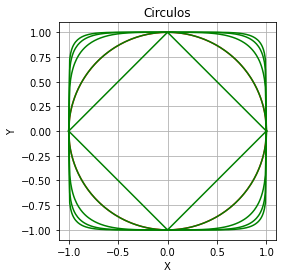

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

num_segmentos = 200
rad = 2


angulo = np.linspace(0, 2*np.pi, num_segmentos+1)
x = np.cos(angulo)
y = np.sin(angulo)
plt.plot(x, y, color="red", markersize=1)

pext=np.array([1,2,4,6,8])
for p in pext:
    xx=np.linspace(-1.0,1.0,num_segmentos)
    yy=np.power(1.0-np.absolute(np.power(xx,p)),1/p)
    plt.plot(xx, yy, color="green", markersize=1)
    plt.plot(xx, -yy, color="green", markersize=1)


plt.title("Circulos")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

## Kmeans

Tomado de [Implementing the k-means algorithm with numpy](https://flothesof.github.io/k-means-numpy.html)

```
# Esto tiene formato de código
```



In [ ]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

Creación de los puntos un vector de 250 puntos en el p´lano cartesiano

In [ ]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(20, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(20, 2) * 0.5 + np.array([-0.5, -0.5]))))

In [ ]:
points.shape

(9, 2)

Gráfica de lo puntos en el plano, y escogencia de los clusters iniciales 

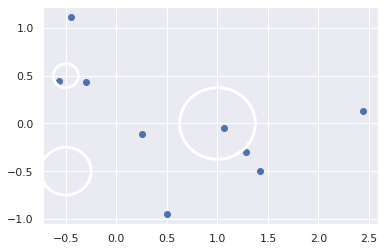

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

inicializa centroides 

In [ ]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [ ]:
initialize_centroids(points, 3)

array([[ 0.49616568, -0.95300339],
       [-0.57208225,  0.44120042],
       [ 1.06850999, -0.04933413]])

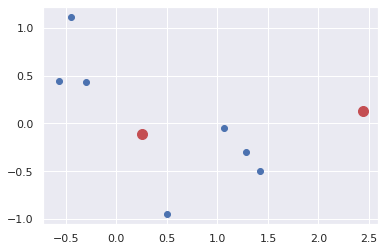

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# función que cáclula la distancia de los centros 

In [ ]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    p=2
    distances=np.power(((points - centroids[:, np.newaxis])**p).sum(axis=2),1/p)
    
    # distances construye la matriz de la distancia de cada centroide con todos los puntos de esta forma l aprimera linea es la distacia de del primer centroide con el resto de los puntos en su orden
    return np.argmin(distances, axis=0)
    # cuando retorna reorn al posisción del minimo en cada columna

El último paso es mover los centroides 

In [ ]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

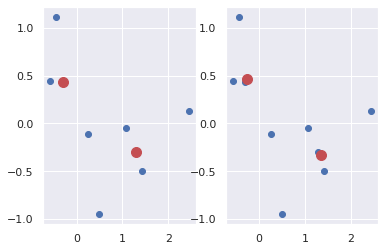

In [ ]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 2)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [ ]:
!pip install matplotlib

In [ ]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1749, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.


AttributeError: ignored

In [ ]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1749, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.


AttributeError: ignored

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 7)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1749, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.


AttributeError: ignored

In [ ]:
ss.shape

(3, 1, 1, 2)

In [ ]:
a=np.array([[10, 11, -2],
       [9, 3, 1],[0,1,5]])
a

array([[10, 11, -2],
       [ 9,  3,  1],
       [ 0,  1,  5]])

In [ ]:
np.argmin(a,axis=1)

array([2, 2, 0])